## Visualizaciones de casos en Chile con Coronavirus

En base a la página del "minsal" realizaremos algunas visualizaciones del Coronavirus, para eso necesitaremos los siguientes pasos:

1. Web scraping: es decir, extraer la información desde la web
2. Guardar la información en formato de dataframe
3. Generar visualizaciones

Vamos allá!

In [70]:
# Obtenemos algunas librerías necesarias
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### 1. Web scraping

In [2]:
url = 'https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
html_soup.text

'\n\n\n\n  \n\n\n\n\n\r\n          Casos confirmados en Chile COVID-19 - Ministerio de Salud - Gobierno de Chile        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\twindow._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/12.0.0-1\\/72x72\\/","ext":".png","svgUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/12.0.0-1\\/svg\\/","svgExt":".svg","source":{"concatemoji":"https:\\/\\/www.minsal.cl\\/wp-includes\\/js\\/wp-emoji-release.min.js?ver=5.2.2"}};\n\t\t\t!function(a,b,c){function d(a,b){var c=String.fromCharCode;l.clearRect(0,0,k.width,k.height),l.fillText(c.apply(this,a),0,0);var d=k.toDataURL();l.clearRect(0,0,k.width,k.height),l.fillText(c.apply(this,b),0,0);var e=k.toDataURL();return d===e}function e(a){var b;if(!l||!l.fillText)return!1;switch(l.textBaseline="top",l.font="600 32px Arial",a){case"flag":return!(b=d([55356,56826,55356,56819],[55356,56826,8203,55356,56819]))&&(b=d([55356,57332,56128,56423,56128,56418,56128,56421,56128,56430,56128,56423,56128,56

### 2. Guardar la información en formato de dataframe

In [4]:
regiones = [] # [[región1, sexo1, edad1, centro_salud1] ....]
filas = [] # Se guarda cada una de las tuplas sin parsear aún


#Se obtienen las tuplas de la tabla
for table in html_soup.find_all('table'):
    for tr in table.find_all('tr'):
        filas.append(tr)
    break
    
#Se parsean y se obtienen los datos
region = ''
centro = ''
for i in range(2, len(filas)-1):
    temp = []
    for td in filas[i].find_all('td'):
        temp.append(td)
    if len(temp) == 5:
        #print(patron.findall(temp[1].text))
        region = temp[0].text.strip()
        regiones.append([temp[0].text.strip(), temp[2].text.strip(), temp[3].text.strip(), temp[4].text.strip()])
        #casos_confirmados.append(temp[1].text)
        #sexo.append(temp[2].text)
        #edad.append(temp[3].text)
        #centro_salud.append(temp[4].text)
    elif len(temp) == 3:
        centro = temp[2].text.strip()
        regiones.append([region, temp[0].text.strip(), temp[1].text.strip(), temp[2].text.strip()])
    else:
        regiones.append([region, temp[0].text.strip(), temp[1].text.strip(), centro])

In [5]:
#Se normalizan los datos
#patron = re.compile(r'\d+')
femenino = re.compile(r'\bFeme(m|M)ino\b')
for i in range(0,4):
    for x in regiones:
        if x[i] == '—':
            x[i] = np.nan
        elif i == 1:
            x[i] = femenino.sub("Femenino", x[i])
        elif i == 3:
            x[i] = x[i].replace('\n',' ')

In [6]:
#Se setea los encabezados de cada columna del DataFrame
df = pd.DataFrame(regiones, columns=['Región', 'Sexo', 'Edad', 'Centro_salud'])


In [7]:
df

,Región,Sexo,Edad,Centro_salud
0,Arica y Parinacota,NaN,NaN,NaN
1,Tarapacá,NaN,NaN,NaN
2,Antofagasta,NaN,NaN,NaN
3,Atacama,NaN,NaN,NaN
4,Coquimbo,NaN,NaN,NaN
5,Valparaíso,NaN,NaN,NaN
6,Metropolitana,Femenino,54,Clínica Alemana
7,Metropolitana,Femenino,40,Clínica Santa María
8,Metropolitana,Masculino,58,Clínica Alemana
9,Metropolitana,Masculino,17,Clínica Alemana


In [8]:
#Se eliminan las tuplas que contienen NaN
df_zero_na = df.dropna()

In [9]:
df_zero_na = df_zero_na.reset_index(drop=True)

In [10]:
df_zero_na.head()

,Región,Sexo,Edad,Centro_salud
0,Metropolitana,Femenino,54,Clínica Alemana
1,Metropolitana,Femenino,40,Clínica Santa María
2,Metropolitana,Masculino,58,Clínica Alemana
3,Metropolitana,Masculino,17,Clínica Alemana
4,Metropolitana,Femenino,83,Clínica Las Condes


### 3. Generar visualizaciones

In [11]:
df1 = df_zero_na.groupby('Región')['Región'].count().reset_index(name='Cantidad')

In [12]:
df1

,Región,Cantidad
0,Biobío,3
1,Los Lagos,1
2,Maule,8
3,Metropolitana,28
4,Ñuble,2


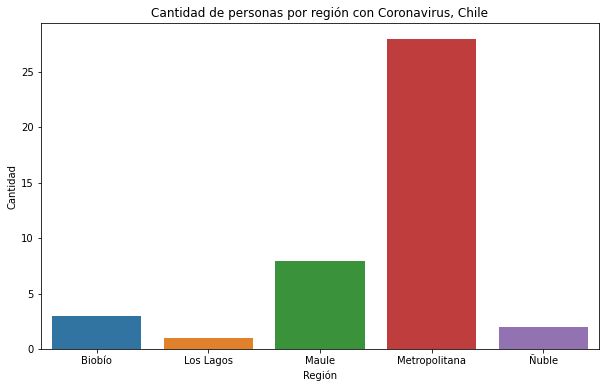

In [62]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Región', y='Cantidad', data=df1);
plt.title('Cantidad de personas por región con Coronavirus, Chile')
plt.show();
#df1.plot(kind='bar',x='Región',y='Cantidad');

In [26]:
# Algunos mensajes quedaron clasificados como del tipo númerico, cambiemos a string

df_zero_na['Edad'] = df_zero_na['Edad'].astype(int)

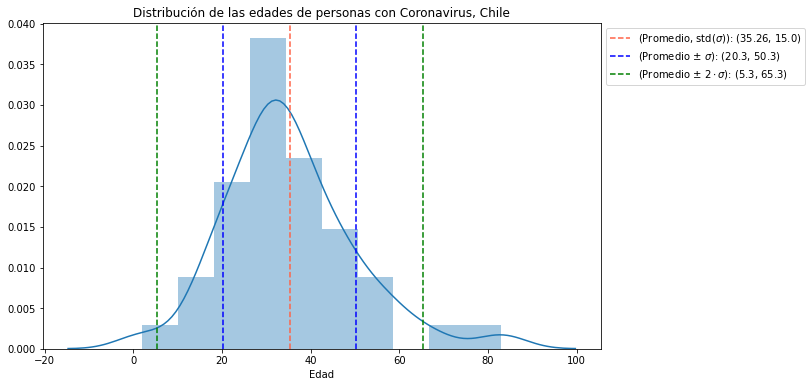

In [57]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_zero_na['Edad']).set_title('Distribución de las edades de personas con Coronavirus, Chile')
plt.axvline(df_zero_na['Edad'].mean(), color = 'tomato',  label='(Promedio, std($\sigma$)): ('+ str(round(df_zero_na['Edad'].mean(), 2))+ ', ' +str(round(df_zero_na['Edad'].std(), 2))+ ')', linestyle = '--');
plt.axvline(df_zero_na['Edad'].mean() + df_zero_na['Edad'].std(), color = 'blue',  label='(Promedio $\pm$ $\sigma$): ('+ str(round(df_zero_na['Edad'].mean() - df_zero_na['Edad'].std(), 1)) + ', ' + str(round(df_zero_na['Edad'].mean() + df_zero_na['Edad'].std(), 1)) + ')', linestyle = '--');
plt.axvline(df_zero_na['Edad'].mean() - df_zero_na['Edad'].std(), color = 'blue', linestyle = '--');
plt.axvline(df_zero_na['Edad'].mean() + 2*df_zero_na['Edad'].std(), color = 'green',  label='(Promedio $\pm$ $2\cdot\sigma$): ('+ str(round(df_zero_na['Edad'].mean() - 2*df_zero_na['Edad'].std() , 1))+ ', ' + str(round(df_zero_na['Edad'].mean() + 2*df_zero_na['Edad'].std(), 1)) + ')', linestyle = '--');
plt.axvline(df_zero_na['Edad'].mean() - 2*df_zero_na['Edad'].std(), color = 'green', linestyle = '--');
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show();

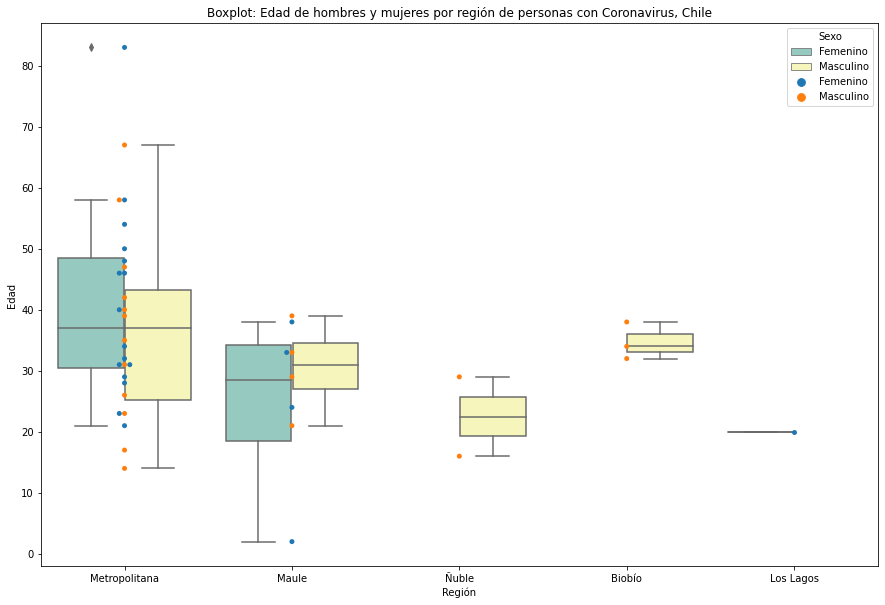

In [60]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Región", y="Edad", hue="Sexo", data=df_zero_na, palette="Set3")
ax = sns.swarmplot(x="Región", y="Edad", hue="Sexo", data=df_zero_na)
plt.title('Boxplot: Edad de hombres y mujeres por región de personas con Coronavirus, Chile')
plt.show()

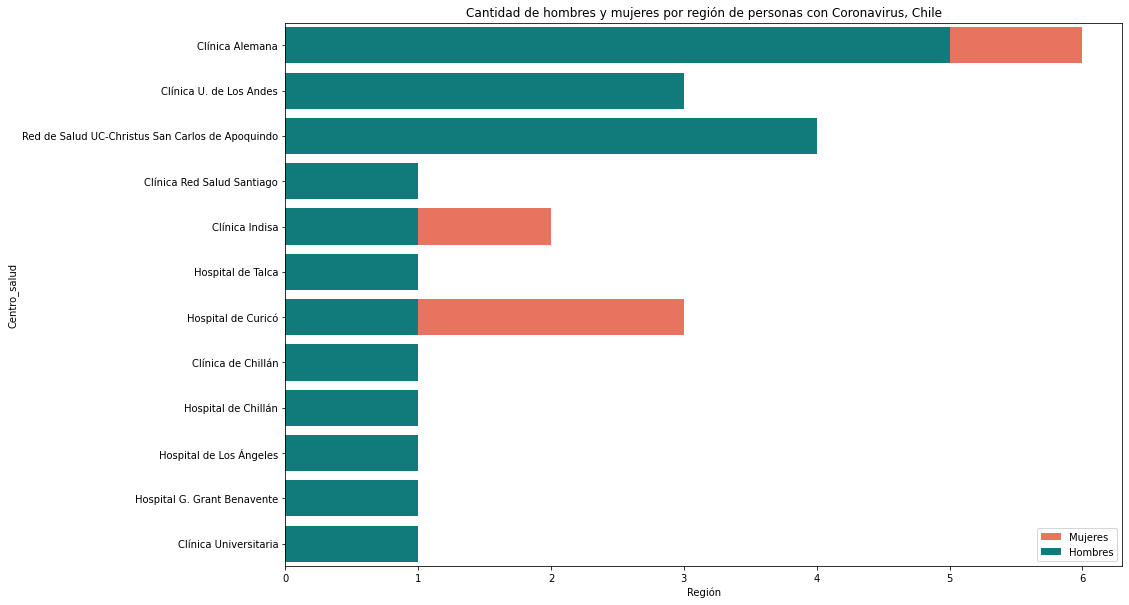

In [67]:
#df_zero_na.groupby(['Región','Sexo']).size().unstack().plot(kind='bar',stacked=True
plt.figure(figsize=(15,10))
ax = sns.countplot(y= df_zero_na[df_zero_na['Sexo'] == 'Femenino']['Centro_salud'], color = 'tomato', label = 'Mujeres')
ax = sns.countplot(y= df_zero_na[df_zero_na['Sexo'] == 'Masculino']['Centro_salud'], color = 'darkcyan', label = 'Hombres')
plt.title('Cantidad de hombres y mujeres por región de personas con Coronavirus, Chile')
plt.xlabel('Región')
plt.legend(loc='best')
plt.show()

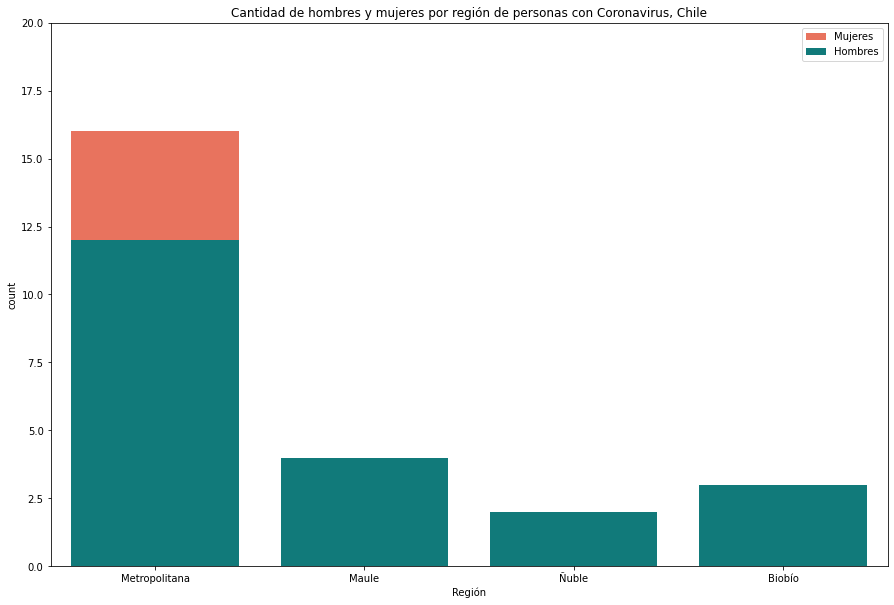

In [43]:
#df_zero_na.groupby(['Región','Sexo']).size().unstack().plot(kind='bar',stacked=True
plt.figure(figsize=(15,10))
ax = sns.countplot(x= df_zero_na[df_zero_na['Sexo'] == 'Femenino']['Región'], color = 'tomato', label = 'Mujeres')
ax = sns.countplot(x= df_zero_na[df_zero_na['Sexo'] == 'Masculino']['Región'], color = 'darkcyan', label = 'Hombres')
plt.title('Cantidad de hombres y mujeres por región de personas con Coronavirus, Chile')
plt.xlabel('Región')
ax.set_ylim(0,20)
plt.legend(loc='best')
plt.show()

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Covid19-CL", timeout=10)
location = geolocator.geocode("Región Metropolitana, Chile")
print(location.address)
print((location.latitude, location.longitude))

San Pablo 2966 5to Piso, Santiago, Región Metropolitana, Chile, 2966, Avenida San Pablo, Quinta Normal, Provincia de Santiago, Región Metropolitana de Santiago, 8350485, Chile
(-33.4354421, -70.6766162)


In [88]:
geolocator.geocode('Ñuñoa, Región Metropolitana')

Location(Ñuñoa, Provincia de Santiago, Región Metropolitana de Santiago, Chile, (-33.4543304, -70.60058198319726, 0.0))

In [17]:
from geopy.extra.rate_limiter import RateLimiter

df_loc = df_zero_na
df_loc['Address'] = 'Región ' + df_loc['Región'] + ', Chile'
lat = []
lon = []
for index, row in df_loc.iterrows():
    location = geolocator.geocode(row['Address'])
    lat.append(location.latitude)
    lon.append(location.longitude)
df_loc['lat'] = lat
df_loc['lon'] = lon
df_loc

,Región,Sexo,Edad,Centro_salud,Address,lat,lon
0,Metropolitana,Femenino,54,Clínica Alemana,"Región Metropolitana, Chile",-33.435442,-70.676616
1,Metropolitana,Femenino,40,Clínica Santa María,"Región Metropolitana, Chile",-33.435442,-70.676616
2,Metropolitana,Masculino,58,Clínica Alemana,"Región Metropolitana, Chile",-33.435442,-70.676616
3,Metropolitana,Masculino,17,Clínica Alemana,"Región Metropolitana, Chile",-33.435442,-70.676616
4,Metropolitana,Femenino,83,Clínica Las Condes,"Región Metropolitana, Chile",-33.435442,-70.676616
5,Metropolitana,Masculino,14,Clínica Alemana,"Región Metropolitana, Chile",-33.435442,-70.676616
6,Metropolitana,Masculino,42,Clínica U. de Los Andes,"Región Metropolitana, Chile",-33.435442,-70.676616
7,Metropolitana,Masculino,40,Clínica U. de Los Andes,"Región Metropolitana, Chile",-33.435442,-70.676616
8,Metropolitana,Femenino,31,Clínica Santa María,"Región Metropolitana, Chile",-33.435442,-70.676616
9,Metropolitana,Femenino,32,Clínica Alemana,"Región Metropolitana, Chile",-33.435442,-70.676616


In [91]:
import folium
from folium.plugins import MarkerCluster

map1 = folium.Map(
    location=[-35.675148,-71.5429688],
    tiles='OpenStreetMap',
    zoom_start=4.5,
)
mc = MarkerCluster()

for row in df_loc.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lon], popup=folium.Popup('Edad: ' + str(row.Edad) + ' ' + row.Sexo + '  (' + row.Centro_salud + ')', max_width=90)))
mc.add_to(map1)
map1

In [75]:
df_rm_loc = df_loc[df_loc['Región'] == 'Metropolitana']

In [80]:
df_rm_loc.columns

Index(['Región', 'Sexo', 'Edad', 'Centro_salud', 'Address', 'lat', 'lon'], dtype='object')

In [81]:
df_rm_loc = df_rm_loc.loc[:, ['Región', 'Sexo', 'Edad', 'Centro_salud', 'Address']]

In [82]:
df_rm_loc['Centro_salud'].value_counts().index

Index(['Clínica Alemana', 'Clínica U. de Los Andes', 'Clínica Santa María',
       'Clínica Las Condes',
       'Red de Salud UC-Christus San Carlos de Apoquindo', 'Clínica Tabancura',
       'Clínica Red Salud Santiago', 'Laboratorio Integramédica',
       'Clínica Indisa', 'Hospital de Carabineros'],
      dtype='object')

In [85]:
conditions = [(df_rm_loc['Centro_salud'] == 'Clínica Alemana') | (df_rm_loc['Centro_salud'] == 'Clínica Tabancura'),
              (df_rm_loc['Centro_salud'] == 'Clínica Santa María') | (df_rm_loc['Centro_salud'] == 'Clínica Indisa'),
              (df_rm_loc['Centro_salud'] == 'Red de Salud UC-Christus San Carlos de Apoquindo') | (df_rm_loc['Centro_salud'] == 'Clínica U. de Los Andes') | (df_rm_loc['Centro_salud'] == 'Clínica Las Condes') | (df_rm_loc['Centro_salud'] == 'Laboratorio Integramédica'),
              (df_rm_loc['Centro_salud'] == 'Clínica Red Salud Santiago'),
              (df_rm_loc['Centro_salud'] == 'Hospital de Carabineros')]
choices = ['Vitacura', 'Providencia', 'Las Condes', 'Estación central', 'Ñuñoa'] 
df_rm_loc['comuna'] = np.select(conditions, choices, default= None)

In [94]:
df_rm_loc['comuna'].value_counts()

Vitacura            13
Las Condes           9
Providencia          4
Estación central     1
Ñuñoa                1
Name: comuna, dtype: int64

In [90]:
df_rm_loc['New_Address'] = df_rm_loc['comuna'] +","+df_rm_loc['Address']
lat = []
lon = []
for index, row in df_rm_loc.iterrows():
    location = geolocator.geocode(row['New_Address'])
    lat.append(location.latitude)
    lon.append(location.longitude)
df_rm_loc['lat'] = lat
df_rm_loc['lon'] = lon
df_rm_loc

,Región,Sexo,Edad,Centro_salud,Address,comuna,New_Address,lat,lon
0,Metropolitana,Femenino,54,Clínica Alemana,"Región Metropolitana, Chile",Vitacura,"Vitacura,Región Metropolitana, Chile",-33.380206,-70.565796
1,Metropolitana,Femenino,40,Clínica Santa María,"Región Metropolitana, Chile",Providencia,"Providencia,Región Metropolitana, Chile",-33.428838,-70.611337
2,Metropolitana,Masculino,58,Clínica Alemana,"Región Metropolitana, Chile",Vitacura,"Vitacura,Región Metropolitana, Chile",-33.380206,-70.565796
3,Metropolitana,Masculino,17,Clínica Alemana,"Región Metropolitana, Chile",Vitacura,"Vitacura,Región Metropolitana, Chile",-33.380206,-70.565796
4,Metropolitana,Femenino,83,Clínica Las Condes,"Región Metropolitana, Chile",Las Condes,"Las Condes,Región Metropolitana, Chile",-33.424788,-70.517498
5,Metropolitana,Masculino,14,Clínica Alemana,"Región Metropolitana, Chile",Vitacura,"Vitacura,Región Metropolitana, Chile",-33.380206,-70.565796
6,Metropolitana,Masculino,42,Clínica U. de Los Andes,"Región Metropolitana, Chile",Las Condes,"Las Condes,Región Metropolitana, Chile",-33.424788,-70.517498
7,Metropolitana,Masculino,40,Clínica U. de Los Andes,"Región Metropolitana, Chile",Las Condes,"Las Condes,Región Metropolitana, Chile",-33.424788,-70.517498
8,Metropolitana,Femenino,31,Clínica Santa María,"Región Metropolitana, Chile",Providencia,"Providencia,Región Metropolitana, Chile",-33.428838,-70.611337
9,Metropolitana,Femenino,32,Clínica Alemana,"Región Metropolitana, Chile",Vitacura,"Vitacura,Región Metropolitana, Chile",-33.380206,-70.565796


In [92]:
map2 = folium.Map(
    location=[-35.675148,-71.5429688],
    tiles='OpenStreetMap',
    zoom_start=4.5,
)
mc = MarkerCluster()

for row in df_rm_loc.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lon], popup=folium.Popup('Edad: ' + str(row.Edad) + ' ' + row.Sexo + '  (' + row.Centro_salud + ')', max_width=90)))
mc.add_to(map2)
map2